# SuperTrend

http://www.freebsensetips.com/blog/detail/7/What-is-supertrend-indicator-its-calculation

https://stocksfetcher.com/supertrend/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
n = 7 # Number of periods
df['H-L'] = abs(df['High']-df['Low'])
df['H-PC'] = abs(df['High']-df['Close'].shift(1))
df['L-PC'] = abs(df['Low']-df['Close'].shift(1))
df['TR'] = df[['H-L','H-PC','L-PC']].max(axis=1)
df['ATR'] = np.nan
df.ix[n-1,'ATR'] = df['TR'][:n-1].mean()
for i in range(n,len(df)):
    df['ATR'][i]=(df['ATR'][i-1]*(n-1)+ df['TR'][i])/n

In [4]:
f = 3 # Number of factor
# BASIC UPPERBAND = (HIGH + LOW) / 2 + Multiplier * ATR
# BASIC LOWERBAND = (HIGH + LOW) / 2 - Multiplier * ATR
df['BASIC UPPERBAND']=(df['High']+df['Low'])/2+(f*df['ATR'])
df['BASIC LOWERBAND']=(df['High']+df['Low'])/2-(f*df['ATR'])
df['FINAL UPPERBAND']=df['BASIC UPPERBAND']
df['FINAL LOWERBAND']=df['BASIC LOWERBAND']


# FINAL UPPERBAND = IF( (Current BASICUPPERBAND < Previous FINAL UPPERBAND) 
# and (Previous Close > Previous FINAL UPPERBAND)) 
# THEN (Current BASIC UPPERBAND) ELSE Previous FINALUPPERBAND)
for i in range(n,len(df)):
    if df['Close'][i-1]<=df['FINAL UPPERBAND'][i-1]:
        df['FINAL UPPERBAND'][i]=min(df['BASIC UPPERBAND'][i],df['FINAL UPPERBAND'][i-1])
    else:
        df['FINAL UPPERBAND'][i]=df['BASIC UPPERBAND'][i]    

# FINAL LOWERBAND = IF( (Current BASIC LOWERBAND > Previous FINAL LOWERBAND) 
# and (Previous Close < Previous FINAL LOWERBAND)) 
# THEN (Current BASIC LOWERBAND) ELSE Previous FINAL LOWERBAND)
for i in range(n,len(df)):
    if df['Close'][i-1]>=df['BASIC LOWERBAND'][i-1]:
        df['FINAL LOWERBAND'][i]=max(df['BASIC LOWERBAND'][i],df['FINAL LOWERBAND'][i-1])
    else:
        df['FINAL LOWERBAND'][i]=df['BASIC LOWERBAND'][i]   
        
# SUPERTREND = IF(Current Close <= Current FINAL UPPERBAND) 
# THEN Current FINAL UPPERBAND ELSE Current  FINAL LOWERBAND
df['SUPERTREND']=np.nan
for i in df['SUPERTREND']:
    if df['Close'][n-1]<=df['FINAL UPPERBAND'][n-1]:
        df['SUPERTREND'][n-1]=df['FINAL UPPERBAND'][n-1]
    elif df['Close'][n-1]>df['FINAL UPPERBAND'][i]:
        df['SUPERTREND'][n-1]=df['FINAL LOWERBAND '][n-1]

for i in range(n,len(df)):
    if df['SUPERTREND'][i-1]==df['FINAL UPPERBAND'][i-1] and df['Close'][i]<=df['FINAL UPPERBAND'][i]:
        df['SUPERTREND'][i]=df['FINAL UPPERBAND'][i]
    elif df['SUPERTREND'][i-1]==df['FINAL UPPERBAND'][i-1] and df['Close'][i]>=df['FINAL UPPERBAND'][i]:
        df['SUPERTREND'][i]=df['FINAL LOWERBAND'][i]
    elif df['SUPERTREND'][i-1]==df['FINAL LOWERBAND'][i-1] and df['Close'][i]>=df['FINAL LOWERBAND'][i]:
        df['SUPERTREND'][i]=df['FINAL LOWERBAND'][i]
    elif df['SUPERTREND'][i-1]==df['FINAL LOWERBAND'][i-1] and df['Close'][i]<=df['FINAL LOWERBAND'][i]:
        df['SUPERTREND'][i]=df['FINAL UPPERBAND'][i]

In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,H-L,H-PC,L-PC,TR,ATR,BASIC UPPERBAND,BASIC LOWERBAND,FINAL UPPERBAND,FINAL LOWERBAND,SUPERTREND
Date,,,,,,,,,,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,4.449997,NaN,NaN,4.449997,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,8.029999,6.880005,1.149994,8.029999,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,3.260009,1.350006,1.910003,3.260009,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,2.179993,1.259995,0.919998,2.179993,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,2.740005,0.429993,2.310012,2.740005,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-08,206.050003,207.809998,204.520004,207.250000,204.928696,22525500,3.289994,0.699997,2.589997,3.289994,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-09,207.279999,209.779999,207.199997,208.880005,206.540436,23469200,2.580002,2.529999,0.050003,2.580002,3.991666,220.464997,196.515000,220.464997,196.515000,220.464997
2018-08-10,207.360001,209.100006,206.669998,207.529999,205.925232,24611200,2.430008,0.220001,2.210007,2.430008,3.768572,219.190718,196.579286,219.190718,196.579286,219.190718
2018-08-13,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,3.250000,3.419998,0.169998,3.419998,3.718776,220.481325,198.168669,219.190718,198.168669,219.190718


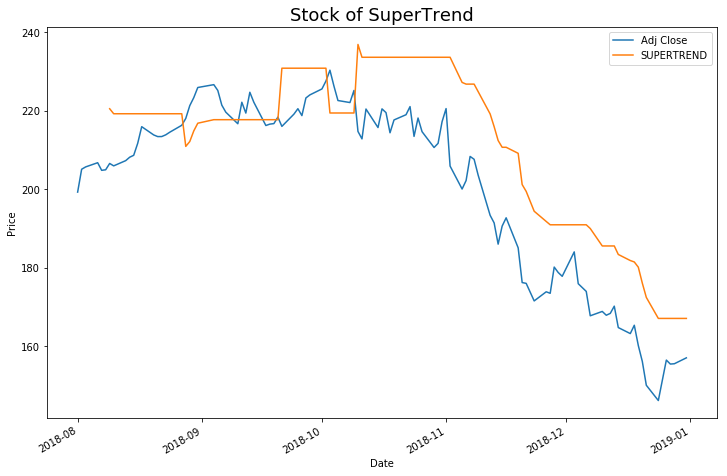

In [6]:
plt.figure(figsize=(12,8))

df['Adj Close'].plot()
df['SUPERTREND'].plot()
plt.title('Stock of SuperTrend', fontsize=18)
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Candlestick with SuperTrend

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,H-L,H-PC,L-PC,TR,ATR,BASIC UPPERBAND,BASIC LOWERBAND,FINAL UPPERBAND,FINAL LOWERBAND,SUPERTREND,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,4.449997,NaN,NaN,4.449997,NaN,NaN,NaN,NaN,NaN,NaN,True
1,736908.0,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,8.029999,6.880005,1.149994,8.029999,NaN,NaN,NaN,NaN,NaN,NaN,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,3.260009,1.350006,1.910003,3.260009,NaN,NaN,NaN,NaN,NaN,NaN,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,2.179993,1.259995,0.919998,2.179993,NaN,NaN,NaN,NaN,NaN,NaN,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,2.740005,0.429993,2.310012,2.740005,NaN,NaN,NaN,NaN,NaN,NaN,False


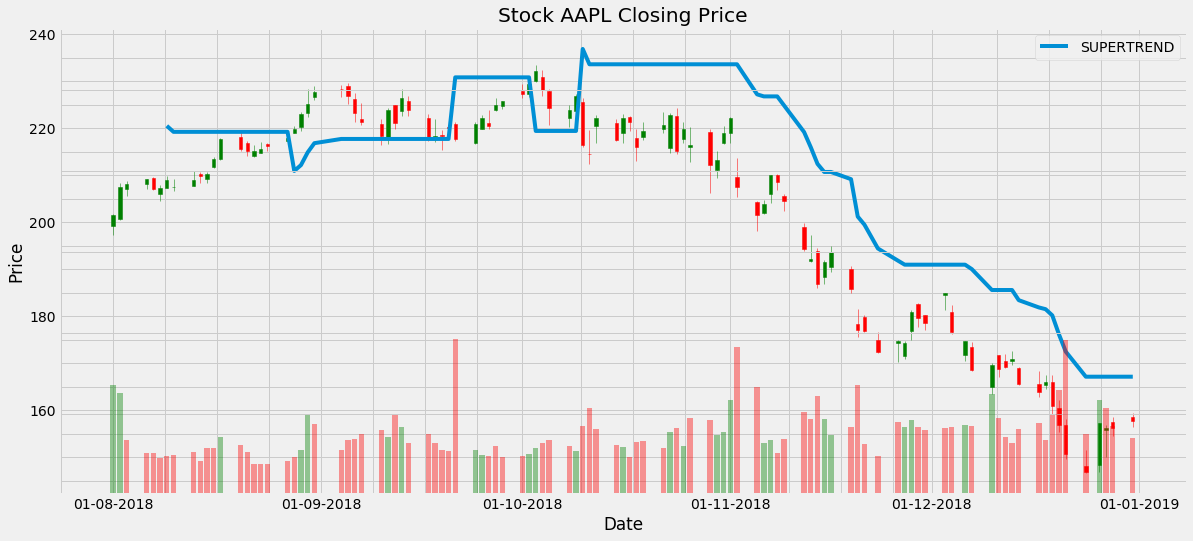

In [8]:
from mpl_finance import candlestick_ohlc

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['SUPERTREND'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend()